<img src="./logo_UTN.svg" align="right" width="150" /> 

### Procesamiento Digital de Señales

## Trabajo Práctico Nº3 - "Simulación de un ADC (cuantización) parte 1/2"

### Gabriel Cruz

### Enunciado

En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, 
tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal 
(aproximadamente) analógica.

Para ello se puede analizar una senoidal con los siguientes parámetros:

- frecuencia f0 arbitraria, por ejemplo f0=fS/N=Δf
- Amplitud normalizada, es decir unitaria

Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo sR
, de forma tal que para un ADC de B bits y rango ± VF, el operador.

sQ=QB,VF{sR}

generará una sQ comprendida entre ± VF y con valores discretos establecidos por 
el paso de cuantización q=2.VF/2^B−1 ≈ VF/ 2^(B−1) (Volts).

Visualice en una misma gráfica sR y sQ, donde se pueda observar que tienen 
el mismo rango en Volts y el efecto de la cuantización para VF=2 Volts 
y  B = 4, 8 y 16 bits.

## Función Realizada

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#%% Funcion cuantificadora
def cuantificador(sR, B, VF):
    #Paso de cuantificacion
    q = VF / (2**(B - 1))
    #Realiza un redondeo
    sQ = np.round(sR / q) * q
    #LImita el rango permitido
    sQ = np.clip(sQ, -VF, VF)    
    
    return sQ 

Vamos a probar el funcionamiento de esta funcion. Para esto vamos a necesitar del generador de señales realizado en el primer TP.

## Analisis de señal senoidal de 1 Volt con un ADC de 4 bits y VF = 2 Volts

In [4]:
#%% Generador de señales senoidales
def     mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = 1000, fs = 1000):
    
    w = 2 * np.pi * ff
    tt = np.arange(0, nn/fs, 1/fs)
    xx = dc + vmax * np.sin(tt * w + ph )
    return tt,xx

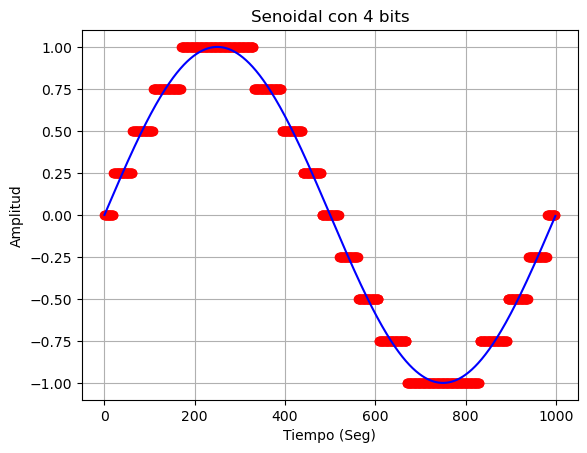

In [24]:
#%% Probando funcion
tt, xx = mi_funcion_sen(1,0,1,0, 1000, 1000)

sQ = cuantificador(xx, 4, 2)

plt.plot(sQ,'ro')
plt.plot(xx,'b-')
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Amplitud')
plt.title('Senoidal con 4 bits')
plt.grid(True)
plt.show()

En el grafico de arriba podemos observar como la señal senoidal de amplitud 1V pico fue cuantificada con un paso de cuantificacion de 0.250 Volts.

## Ahora con un ADC de 8 bits 

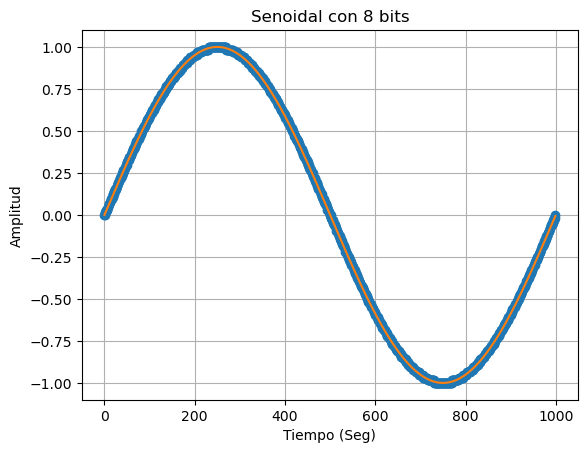

In [25]:
sQ = cuantificador(xx, 8, 2)

plt.plot(sQ,'o')
plt.plot(xx)
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Amplitud')
plt.title('Senoidal con 8 bits')
plt.grid(True)
plt.show()

En el grafico de arriba podemos observar como la señal senoidal ahora fue cuantificada con un paso de cuantificacion de 0.0156 Volts.

## Ahora con ADC de 16 bits

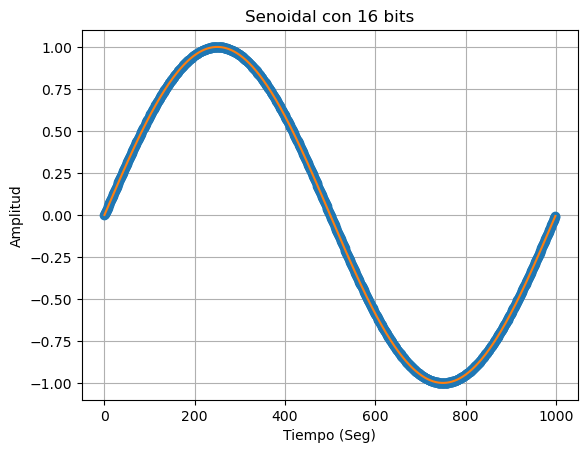

In [26]:
sQ = cuantificador(xx, 16, 2)

plt.plot(sQ,'o')
plt.plot(xx)
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Amplitud')
plt.title('Senoidal con 16 bits')
plt.grid(True)
plt.show()

En el grafico de arriba podemos observar como la señal senoidal ahora fue cuantificada con un paso de cuantificacion de 0.000061 Volts.

## Analisis de la señal de error e = sQ − sR

Vamos a analizar el error de cunatificacion en cada caso.

## Error de cuantificación con 4 bits

Varianza: 0.004593875148040576
Media: 4.440892098500626e-18


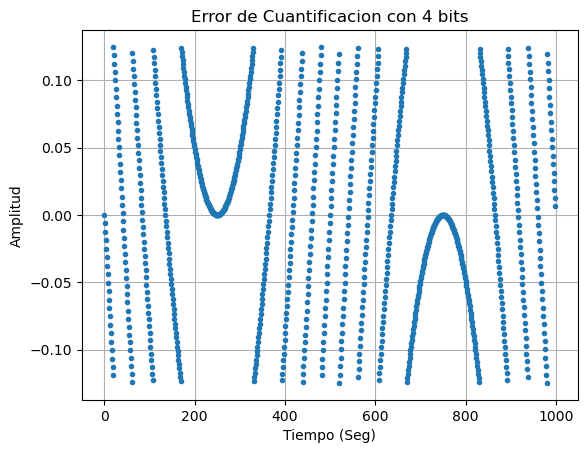

In [27]:
sQ = cuantificador(xx, 4, 2)
eR = sQ - xx

print("Varianza:",eR.var())
print("Media:",eR.mean())

plt.plot(eR,'.')
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Amplitud')
plt.title('Error de Cuantificacion con 4 bits')
plt.grid(True)
plt.show()

Podemos observar que el error de cuantificacion tiene un distribucion uniforme con varianza = 0.0046 y un valor medio practicamente nula.

## Error de cuantificación con 8 bits

Varianza: 1.9618708185307062e-05
Media: 4.98212582300539e-18


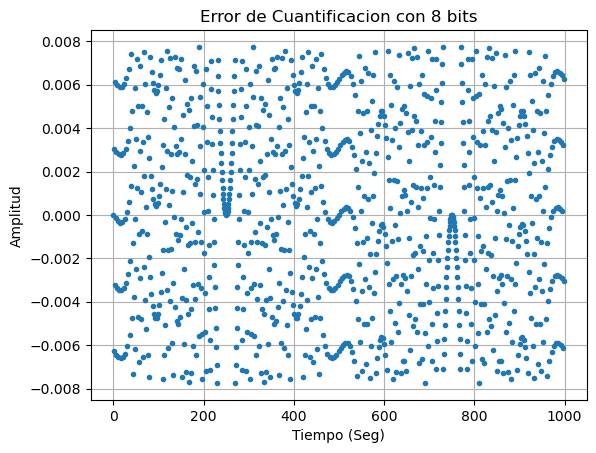

In [30]:
sQ = cuantificador(xx, 8, 2)
eR = sQ - xx

print("Varianza:",eR.var())
print("Media:",eR.mean())

plt.plot(eR,'.')
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Amplitud')
plt.title('Error de Cuantificacion con 8 bits')
plt.grid(True)
plt.show()

Podemos observar que el error de cuantificacion tiene un distribucion uniforme con varianza = 1.96e-05 y media = 0.

## Error de cuantificación con 16 bits 

Varianza: 3.0986899301372543e-10
Media: 4.978493745727564e-18


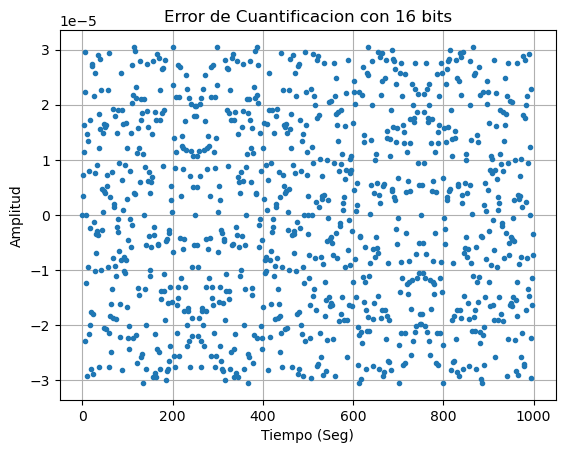

In [31]:
sQ = cuantificador(xx, 16, 2)
eR = sQ - xx

print("Varianza:",eR.var())
print("Media:",eR.mean())

plt.plot(eR,'.')
plt.xlabel('Tiempo (Seg)')
plt.ylabel('Amplitud')
plt.title('Error de Cuantificacion con 16 bits')
plt.grid(True)
plt.show()

Podemos observar que el error de cuantificacion tiene un distribucion uniforme con varianza = 3.1e-10 y media = 0. 

## Conclusión:

Como conclusión en este último analisis podemos concluir que a mayor cantidad de bits en el ADC menor va a hacer la varianza y por lo tanto va a tener menor dispersion.